<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped.svg?sanitize=true">

# Pyosim in the cloud
## with [pyomeca](https://github.com/pyomeca/pyomeca)
Romain Martinez (martinez.staps@gmail.com | [GitHub](https://github.com/romainmartinez))


<!--NAVIGATION-->
< [Verification](01.00-verification.ipynb) | [Contents](Index.ipynb) | [Inverse kinematics](01.02-inverse-kinematics.ipynb) >

# Raw data

We want at least:

- 50% men; 50% women
- weight

In [1]:
from pathlib import Path
import pandas as pd
import altair as alt

In [2]:
PROJECT = Path("/home/romain/Downloads/irsst/")
MODEL = "wu_"
EXT = ".mot"

In [3]:
def parse_conditions(df):
    x = df.copy()
    x["trial"] = x["trial"].str.replace(MODEL, "").str.replace(EXT, "")
    x["participant"] = x["trial"].str[:4].str.lower()
    x["sex"] = x["trial"].str[4].replace({"F": "W", "H": "M"})
    x["height"] = x["trial"].str[-3]
    x["weight"] = x["trial"].str[5:].str.split("H").str[0]
    x["n_trial"] = x["trial"].str[-1]
    return x

In [4]:
verif = (
    pd.read_csv(PROJECT / "verification.csv", index_col=[0])
    .pipe(parse_conditions)
    .assign(tag=lambda x: x["tag"].replace({1: "good", 2: "medium", 3: "bad"}))
)

In [5]:
verif.head()

,filename,trial,tag,note,participant,sex,height,weight,n_trial
0,/home/romain/Downloads/irsst/verc/1_inverse_ki...,VerCF6H2_2,good,NaN,verc,W,2,6,2
1,/home/romain/Downloads/irsst/verc/1_inverse_ki...,VerCF12H2_3,good,NaN,verc,W,2,12,3
2,/home/romain/Downloads/irsst/verc/1_inverse_ki...,VerCF6H2_1,good,NaN,verc,W,2,6,1
3,/home/romain/Downloads/irsst/verc/1_inverse_ki...,VerCF12H2_2,good,NaN,verc,W,2,12,2
4,/home/romain/Downloads/irsst/verc/1_inverse_ki...,VerCF6H2_3,good,NaN,verc,W,2,6,3


In [6]:
verif.groupby('tag').size()

tag
bad      24
good    279
dtype: int64

In [7]:
(verif.groupby('sex').size() / verif.shape[0] * 100).round()

sex
M    62.0
W    38.0
dtype: float64

In [8]:
size = verif.groupby(["tag", "weight", "sex"]).size().rename('n').reset_index()
size.head()

,tag,weight,sex,n
0,bad,12,M,3
1,bad,12,W,5
2,bad,18,M,12
3,bad,6,M,1
4,bad,6,W,3


In [10]:
import plotly_express as px

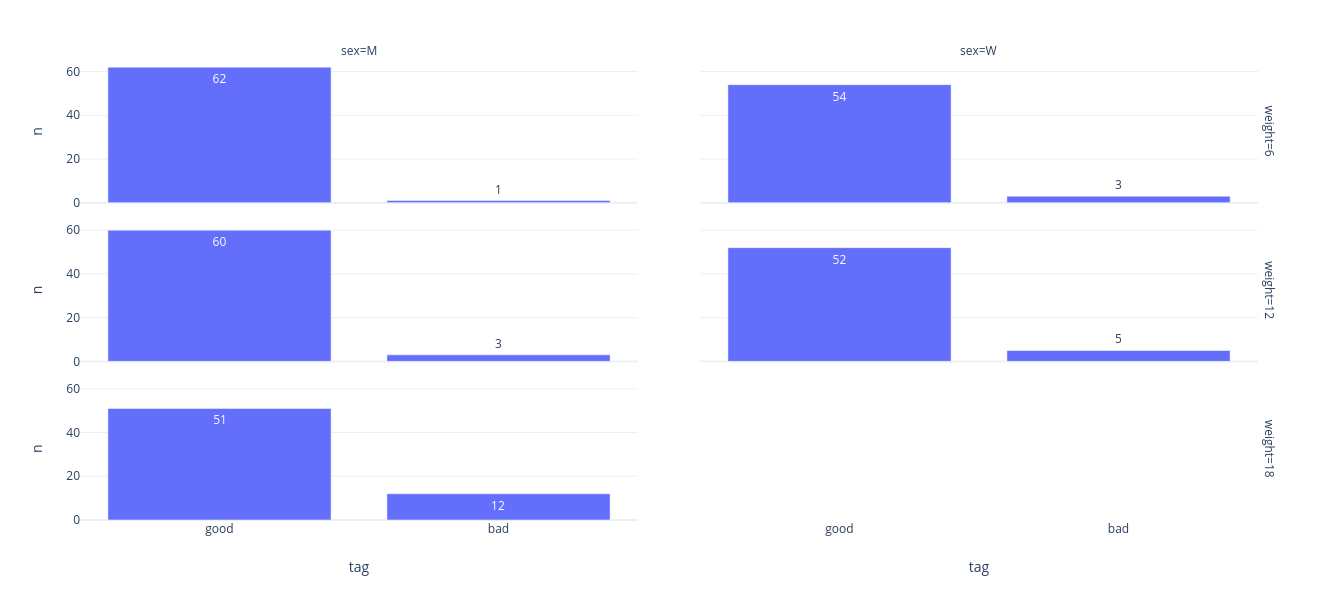

In [48]:
px.bar(
    size,
    x="tag",
    y="n",
    facet_row="weight",
    facet_col="sex",
    text="n",
    width=500,
    template="plotly_white",
    category_orders={"weight": ["6", "12", "18"], "tag": ["good", "bad"]},
)

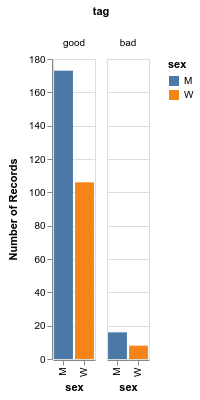

In [45]:
alt.Chart(verif).mark_bar().encode(
    alt.X("sex"),
    alt.Y("count()"),
    alt.Color("sex"),
    alt.Column("tag", sort=alt.Sort(["good", "medium", "bad"])),
    alt.Tooltip("count()"),
)

<!--NAVIGATION-->
< [Verification](01.00-verification.ipynb) | [Contents](Index.ipynb) | [Inverse kinematics](01.02-inverse-kinematics.ipynb) >